# Analiza delnic indeksa Russel 2000

Analiziral bom delnice, ki sestavljajo borzni indeks Russel 2000, ki kotira na londonski borzi. Pridobil sem podatke o imenu podjetij, ceni delnice, spremembi cene delnice, spremembe v odstotkih, PE razmerje, ki nam pove kakšno je vrednotenje delnice glede na njen dobiček, število delnic in sprememba v odstotkih v letošnjem letu.

In [249]:
#naložimo paket
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline

delnice = pd.read_csv('podatki.csv')

V sledeči tabeli imamo vse delnice iz indeksa Russel 2000. 

In [250]:
delnice

,Oznaka,Ime_podjetja,Cena,Sprememba_cene,Sprememba_v_odstotkih,PE_razmerje,Stevilo_delnic,Sprememba_do_danes
0,FLWS,1-800 FLOWERS COM,13.64,-0.160,-1.16%,24.8,478.5K,-5.93%
1,SRCE,1ST SOURCE CORP,50.71,-0.080,-0.16%,14.3,32.2K,-2.26%
2,AHC,A H BELO CORP,2.90,0.009,+0.31%,4.9,27.5K,+2.84%
3,AAON,AAON INC,50.85,0.840,+1.68%,53.0,95.0K,+2.91%
4,AIR,AAR CORP,46.78,0.010,+0.02%,17.9,162.1K,+3.73%
...,...,...,...,...,...,...,...,...
1127,ZAGG,ZAGG INC,7.71,-0.280,-3.50%,59.3,448.0K,-4.93%
1128,ZIOP,ZIOPHARM ONCOLOGY INC,4.55,-0.040,-0.87%,6.1,1.0M,-3.60%
1129,ZIXI,ZIX CORP,7.73,0.215,+2.86%,NM,820.1K,+13.94%
1130,ZGNX,ZOGENIX INC,52.70,0.680,+1.31%,NM,328.5K,+1.09%


Najprej sem uredil tabelo delnice, da so v njej le številke, ki sem jih lahko nato analiziral.

In [251]:
delnice.Stevilo_delnic = (delnice.Stevilo_delnic.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           delnice.Stevilo_delnic.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))


In [252]:
delnice['PE_razmerje'] = delnice['PE_razmerje'].replace('NM',0)


In [253]:
delnice['Sprememba_v_odstotkih'] = delnice['Sprememba_v_odstotkih'].map(lambda x: x.lstrip('+').rstrip('%'))
delnice['Sprememba_do_danes'] = delnice['Sprememba_do_danes'].map(lambda x: x.lstrip('+').rstrip('%'))

In [254]:
delnice['Cena'] = pd.to_numeric(delnice['Cena'],errors='coerce')
delnice['Sprememba_do_danes'] = pd.to_numeric(delnice['Sprememba_do_danes'],errors='coerce')
delnice['Sprememba_v_odstotkih'] = pd.to_numeric(delnice['Sprememba_v_odstotkih'],errors='coerce')
delnice['Stevilo_delnic'] = pd.to_numeric(delnice['Stevilo_delnic'],errors='coerce')
delnice['PE_razmerje'] = pd.to_numeric(delnice['PE_razmerje'],errors='coerce')

In [255]:
delnice['Stevilo_delnic'] = delnice['Stevilo_delnic']/10000
delnice

,Oznaka,Ime_podjetja,Cena,Sprememba_cene,Sprememba_v_odstotkih,PE_razmerje,Stevilo_delnic,Sprememba_do_danes
0,FLWS,1-800 FLOWERS COM,13.64,-0.160,-1.16,24.8,47.85,-5.93
1,SRCE,1ST SOURCE CORP,50.71,-0.080,-0.16,14.3,3.22,-2.26
2,AHC,A H BELO CORP,2.90,0.009,0.31,4.9,2.75,2.84
3,AAON,AAON INC,50.85,0.840,1.68,53.0,9.50,2.91
4,AIR,AAR CORP,46.78,0.010,0.02,17.9,16.21,3.73
...,...,...,...,...,...,...,...,...
1127,ZAGG,ZAGG INC,7.71,-0.280,-3.50,59.3,44.80,-4.93
1128,ZIOP,ZIOPHARM ONCOLOGY INC,4.55,-0.040,-0.87,6.1,100.00,-3.60
1129,ZIXI,ZIX CORP,7.73,0.215,2.86,0.0,82.01,13.94
1130,ZGNX,ZOGENIX INC,52.70,0.680,1.31,0.0,32.85,1.09


V vseh nadaljnih predstavitvah podatkov sem uporabil število delnic v 10 000 zaradi lažje predstavitve.

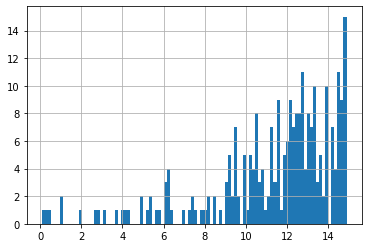

In [256]:
pozitivne_delnice = delnice['PE_razmerje'] > 0
dobicek_delnice=delnice[pozitivne_delnice]
podcenjene_delnice = dobicek_delnice['PE_razmerje'] < 15
dobicek_delnice[podcenjene_delnice]['PE_razmerje'].hist(bins=100)

Graf prikazuje vse delnice, katerih podjetja poslujejo z dobičkom, torej imajo PE razmerje pozitivno, in imajo PE razmerje nižje od 15, kar nam pove, da so manj popularne in torej nižje vrednotene. Opazimo, da ima delež narašča, če je višje PE razmerje.

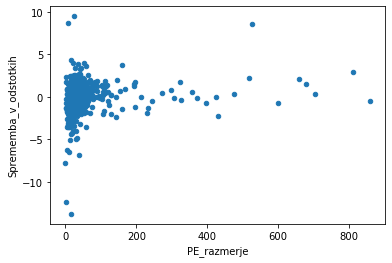

In [257]:
delnice_dobicek = delnice[delnice.PE_razmerje > 0 ]
delnice_dobicek.plot.scatter(x='PE_razmerje',y='Sprememba_v_odstotkih')


Iz grafa razberemo, da večinoma delnice z nižjim PE razmerjem tudi bolj volatilne, torej so imele večja odstopanja v primerjavi s prejšnim letom.

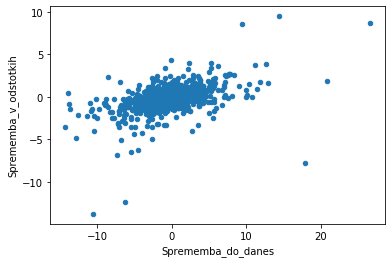

In [258]:
delnice_dobicek2 = delnice[delnice.PE_razmerje > 0 ]
delnice_dobicek2.plot.scatter(x='Sprememba_do_danes',y='Sprememba_v_odstotkih')


Grafično sem skušal preveriti ali je kakšna povezava med spremembo v odstotkih v enem letu in spremembo v odstotkih v letošnjem letu. Za veliko večino sta vrednosti zelo podobni, vidimo pa da je bila rast v letošnjem letu višja kot pa rast v enem letu. V posameznih primerih pa prihaja do večjih odstopanj, kar nam pove, da so se večje spremembe zgodile v začetnih mesecih enega leta.

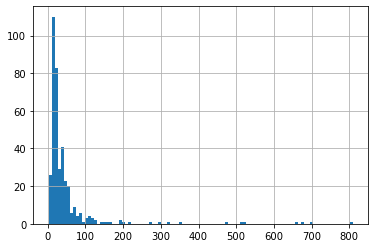

In [259]:
top_delnice = (delnice['Sprememba_v_odstotkih'] > 0) & (delnice['PE_razmerje'] > 0)
delnice[top_delnice]['PE_razmerje'].hist(bins=100)

Primerjal sem delnice, ki so v enem letu pridobile na vrednosti in ustvarjajo dobiček. Ugotovil sem, da je največ teh delnic z nižjim PE razmerjem. 

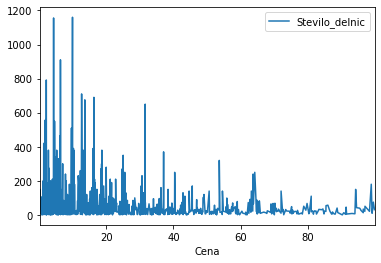

In [260]:

delnice1 = delnice[delnice['Cena'] < 100]
delnice_po_ceni = delnice1.groupby('Cena')
povprecje_po_ceni = delnice_po_ceni.mean()
povprecje_delnice = povprecje_po_ceni[['Stevilo_delnic']]
povprecje_delnice.plot()


Izvedel sem primerjavo delnic s ceno pod 100 funtov in jih združil po ceni. Izbrane delnic sem analiziral po številu delnic in ugotovil, da imajo podjetja z največ delnicami večinoma nižje cene delnic.

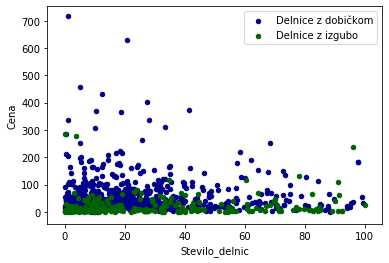

In [261]:
dobicek_delnice = delnice[(delnice['PE_razmerje'] > 0) & (delnice['Stevilo_delnic'] < 100)]
izguba_delnice = delnice[(delnice['PE_razmerje'] == 0) & (delnice['Stevilo_delnic'] < 100)]
ax = dobicek_delnice.plot.scatter(x='Stevilo_delnic', y='Cena', color='DarkBlue', label='Delnice z dobičkom')
izguba_delnice.plot.scatter(x='Stevilo_delnic', y='Cena', color='DarkGreen', label='Delnice z izgubo', ax=ax)


Primerjal sem podjetja, ki ustvarjajo izgubo in podjetja, ki ustvarjajo dobiček. Zaradi bolj nazorne predstavitve sem se omejil na podjetja, ki imajo manj kot milijon delnic. Razen redkih izjem so delnice podjetij, ki poslujejo z dobičkom precej višje vrednotena.

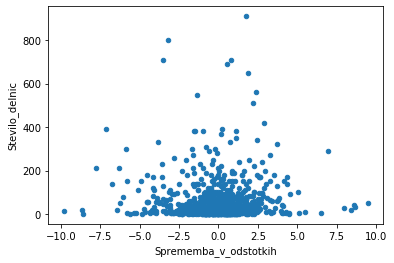

In [262]:
delnice4 = delnice[delnice.Sprememba_v_odstotkih > -10 ]
delnice5 = delnice4[delnice4.Sprememba_v_odstotkih < 10 ]
delnice6 = delnice5[delnice5.Stevilo_delnic < 1000 ]
delnice6.plot.scatter(x='Sprememba_v_odstotkih',y='Stevilo_delnic')

Primerjal sem podjetja, ki imajo manj kot milijon delnic. Vidimo, da so podjetja z manjšim število delnic imela večja nihanja cene delnic kot podjetja z več delnicami. 

## Zakluček

Ugotovimo, da so delnice z nižjim PE razmerjem načeloma boljše od tistih z višjim PE razmerjem. Podjetja, ki imajo na borti manj delnic so manj volatilna. Cene delnic so višje, če podjetje ustvarja dobiček. 